In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Configuración de parámetros
img_size = (299, 299)  # Tamaño de entrada esperado por InceptionV3
batch_size = 32
epochs = 100
learning_rate = 1e-4

# Cargar el modelo InceptionV3 preentrenado en ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Congelar las capas base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce la dimensión espacial
x = Dropout(0.5)(x)  # Regularización
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Cambia el número de clases según tu conjunto de datos

# Construir el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Guardar el modelo entrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_inceptionv3.h5')


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/100


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.4290 - loss: 1.2661 - val_accuracy: 0.7222 - val_loss: 0.7331
Epoch 2/100
 1/85 ━━━━━━━━━━━━━━━━━━━━ 1:55 1s/step - accuracy: 0.6562 - loss: 0.8131

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6562 - loss: 0.8131 - val_accuracy: 1.0000 - val_loss: 0.2066
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.6264 - loss: 0.8309 - val_accuracy: 0.7431 - val_loss: 0.6699
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5938 - loss: 0.7381 - val_accuracy: 0.0000e+00 - val_loss: 1.8924
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.6917 - loss: 0.7179 - val_accuracy: 0.7465 - val_loss: 0.6527
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.7206 - val_accuracy: 1.0000 - val_loss: 0.3086
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.7017 - loss: 0.6784 - val_accuracy: 0.7431 - val_loss: 0.6553
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.6224 - val_accuracy: 1.0000 - val_loss: 0.9074
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.6967 - loss: 0.6573 - val_accuracy: 0.7431 - val_l

Found 141 images belonging to 3 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8968 - loss: 0.1895
Precisión en el conjunto de prueba: 0.91
Pérdida en el conjunto de prueba: 0.18
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
Reporte de Clasificación:
              precision    recall  f1-score   support

      Bengin       0.84      0.82      0.83        39
   Malignant       1.00      0.99      0.99        72
      Normal       0.78      0.83      0.81        30

    accuracy                           0.91       141
   macro avg       0.87      0.88      0.88       141
weighted avg       0.91      0.91      0.91       141



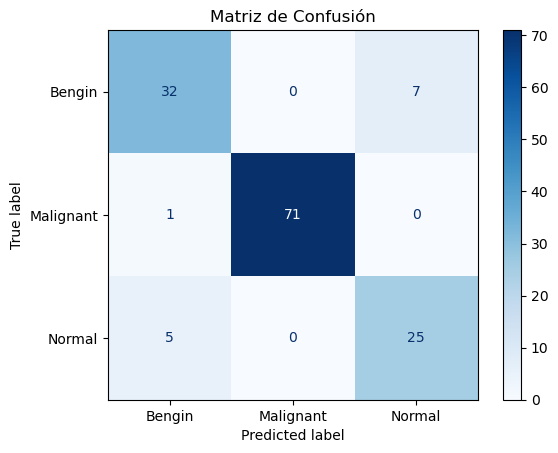

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Configuración de parámetros
img_size = (299, 299)  # Tamaño esperado por InceptionV3
batch_size = 32

# Cargar el modelo entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_inceptionv3_v4.h5'
model = load_model(model_path)

# Configuración del generador de datos para el conjunto de prueba
test_dir = 'C:/Users/yeiko/Capstone/Dataset/test'
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Importante para alinear predicciones con etiquetas
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.2f}")

# Obtener predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), zero_division=1))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


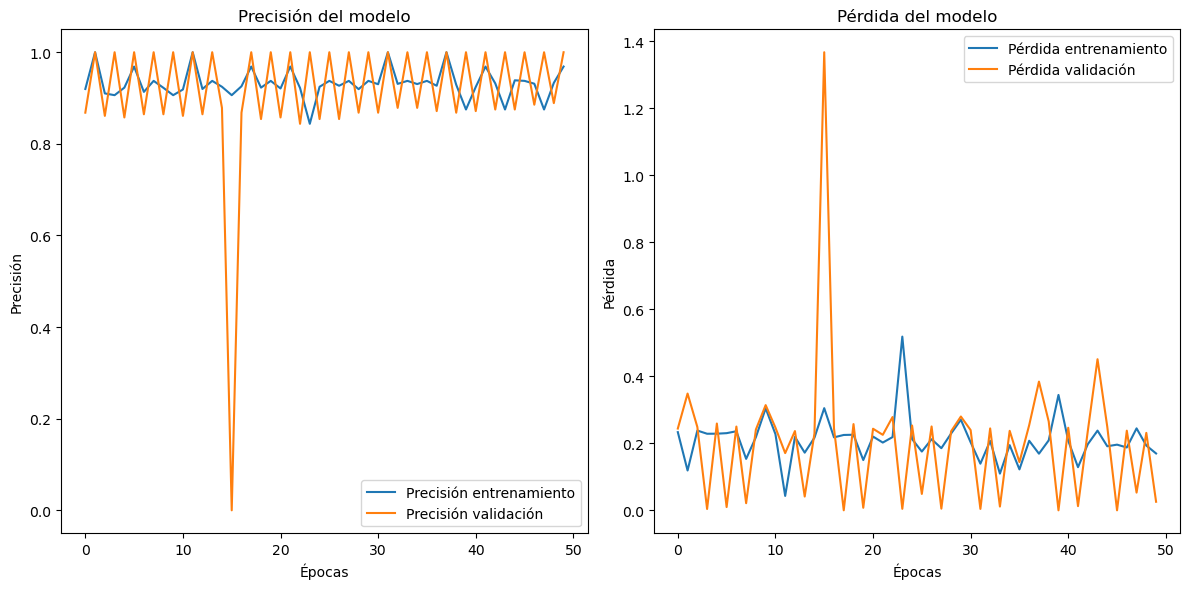

In [11]:
import matplotlib.pyplot as plt

# Suponiendo que `history` es el historial del entrenamiento del modelo
# Si ya tienes el historial, puedes cargarlo directamente o usar la variable `history`
# Ejemplo: history = model.fit(...)

# Graficar precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subgráfico para la precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)  # Subgráfico para la pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

# Configuración de parámetros
img_size = (299, 299)  # Tamaño esperado por InceptionV3
batch_size = 32
retrain_epochs = 50  # Número de épocas para el reentrenamiento
learning_rate = 1e-5  # Tasa de aprendizaje reducida para fine-tuning

# Cargar el modelo previamente entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_inceptionv3_v3.h5'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"El archivo del modelo no existe en la ruta: {model_path}")
model = load_model(model_path)

# Descongelar las últimas capas del modelo base para realizar fine-tuning
for layer in model.layers[-30:]:  # Ajusta el número de capas descongeladas según sea necesario
    layer.trainable = True

# Compilar el modelo con una nueva tasa de aprendizaje
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,  # Aumenta la rotación
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calcular pesos de clase para manejar datos desbalanceados
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Reentrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=retrain_epochs,
    class_weight=class_weights_dict  # Aplica pesos de clase
)

# Guardar el modelo reentrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_inceptionv3_v4.h5')


Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/50


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.9078 - loss: 0.2659 - val_accuracy: 0.8681 - val_loss: 0.2439
Epoch 2/50
 1/85 ━━━━━━━━━━━━━━━━━━━━ 2:11 2s/step - accuracy: 1.0000 - loss: 0.1189

C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.1189 - val_accuracy: 1.0000 - val_loss: 0.3484
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.9146 - loss: 0.2351 - val_accuracy: 0.8611 - val_loss: 0.2487
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.2285 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.9171 - loss: 0.2377 - val_accuracy: 0.8576 - val_loss: 0.2589
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.2302 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.9102 - loss: 0.2499 - val_accuracy: 0.8646 - val_loss: 0.2499
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9375 - loss: 0.1535 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.9216 - loss: 0.2147 - val_accuracy: 0.8646 - val_loss: 0.2411